<a href="https://colab.research.google.com/github/sahanjalee/Real-Time-Object-Detection/blob/main/REAL_TIME_OBJECT_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import os

In [ ]:
 #!pip install opencv-contrib-python==3.4.13.47

In [ ]:
labels = open("/content/coco.names").read().strip().split('\n')
print(labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
weights_path = "/content/yolov3.weights"
cfg_path = "/content/yolov3.cfg"
probability_minimum = 0.5
thresold = 0.3

In [ ]:
network = cv2.dnn.readNetFromDarknet(cfg_path,weights_path)


In [ ]:
layers_names_all = network.getLayerNames()
print(layers_names_all)

('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

In [ ]:
layer_names_output = [layers_names_all[i - 1] for i in network.getUnconnectedOutLayers().flatten()]
print(layer_names_output)

['yolo_82', 'yolo_94', 'yolo_106']


In [ ]:
import os
os.getcwd()


'/content'

In [ ]:

image_input = cv2.imread('/content/dog_bike_car.jpg')
print(image_input.shape)





(576, 768, 3)


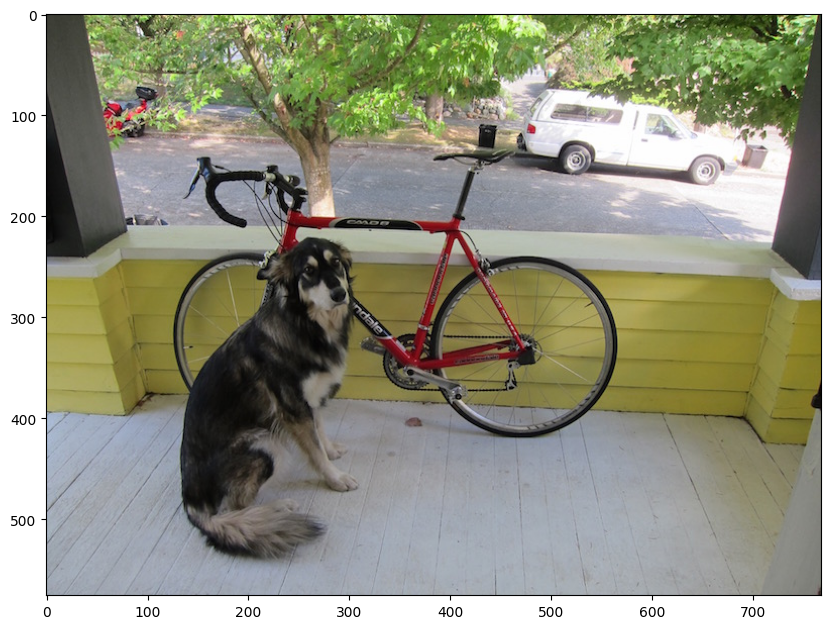

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,10.0)
plt.imshow(cv2.cvtColor(image_input,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
blob = cv2.dnn.blobFromImage(image_input,1/255.0,(416,416),swapRB = True,crop = False)
print(image_input.shape)
print(blob.shape)

(576, 768, 3)
(1, 3, 416, 416)


(416, 416, 3)


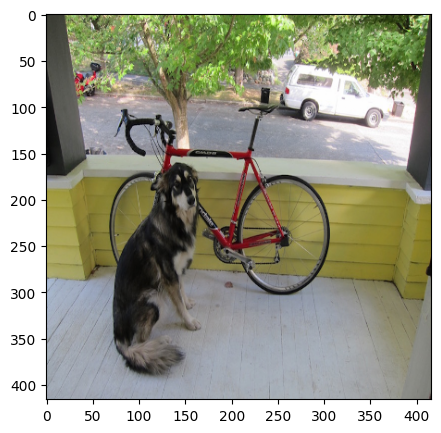

In [ ]:
blob_to_show = blob[0,:,:,:].transpose(1,2,0)
print(blob_to_show.shape)

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0,5.0)
plt.imshow(blob_to_show)
plt.show()



In [ ]:
network.setInput(blob)
start = time.time()
output_from_network = network.forward(layer_names_output)
end = time.time()

print('YOLO v3 took {:.5f} seconds'.format(end - start))

YOLO v3 took 7.67943 seconds


In [ ]:
print(output_from_network)
print(output_from_network[0])

(array([[0.03570006, 0.04303527, 0.39197457, ..., 0.        , 0.        ,
        0.        ],
       [0.04495045, 0.03649297, 0.28322718, ..., 0.        , 0.        ,
        0.        ],
       [0.04346165, 0.03806141, 0.753662  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.956298  , 0.9496912 , 0.3989655 , ..., 0.        , 0.        ,
        0.        ],
       [0.96518314, 0.9616613 , 0.29428107, ..., 0.        , 0.        ,
        0.        ],
       [0.96443343, 0.963203  , 0.7828461 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01954044, 0.02280161, 0.04583394, ..., 0.        , 0.        ,
        0.        ],
       [0.01775153, 0.01779145, 0.40598795, ..., 0.        , 0.        ,
        0.        ],
       [0.02011992, 0.01785002, 0.07523866, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97332346, 0.97479373, 0.05126278, ..., 0.        , 0.        ,
        0.        ],
       [0.9798496 

In [ ]:
np.random.seed(42)
colours = np.random.randint(0,255,size = (len(labels),3),dtype = 'uint8')
print(colours.shape)
print(colours[0])

(80, 3)
[102 220 225]


In [ ]:
boxes = []
confidences = []
class_numbers = []

In [ ]:
h,w = image_input.shape[:2]
print(h,w)

576 768


In [ ]:
for result in output_from_network:
  for detection in result:
    scores = detection[5:]
    class_current = np.argmax(scores)
    confidence_current = scores[class_current]
    if confidence_current > probability_minimum:
      box_current = detection[0:4] * np.array([w,h,w,h])
      x_center,y_center,box_width,box_height = box_current.astype('int')
      x_min = int(x_center - (box_width/2))
      y_min = int(y_center - (box_height/2))

      boxes.append([x_min,y_min,int(box_width),int(box_height)])
      confidences.append(float(confidence_current))
      class_numbers.append (class_current)


In [ ]:
len(boxes)
#len(class_numbers)

14

In [ ]:
result = cv2.dnn.NMSBoxes(boxes,confidences,probability_minimum,thresold)
for i in range(len(class_numbers)):
  print(labels[int(class_numbers[i])])

with open('found_labels.txt','w') as f:
  for i in range(len(class_numbers)):
    f.write(labels[int(class_numbers[i])])
#font = cv2.FONT_HERSHEY_PLAIN
#colors = np.random.uniform(0,255,size = (len(boxes),3) )

truck
truck
truck
bicycle
bicycle
bicycle
bicycle
bicycle
bicycle
bicycle
dog
dog
dog
dog


In [ ]:
if len(result) > 0:
  for i in result.flatten():
      x_min,y_min= boxes[i][0],boxes[i][1]
      box_width,box_height = boxes[i][2],boxes[i][3]

      colour_box_current = [int(j) for j in colours[class_numbers[i]]]

      cv2.rectangle(image_input,(x_min,y_min),(x_min+box_width,y_min+box_height),colour_box_current,5)
      text_box_current = '{}: {:.4f}'.format(labels[int(class_numbers[i])],confidences[i])
      cv2.putText(image_input,text_box_current,(x_min,y_min - 7),cv2.FONT_HERSHEY_SIMPLEX,1.5,colour_box_current,5)

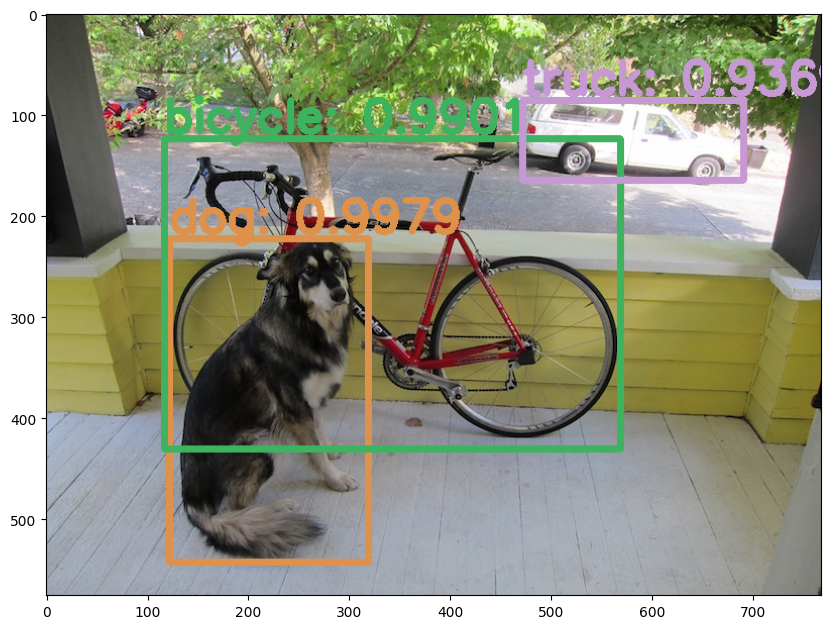

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,10.0)
plt.imshow(cv2.cvtColor(image_input,cv2.COLOR_BGR2RGB))
plt.show()